In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pandas as pd 
import pickle
import seaborn as sns
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [11]:
with open('reg_split_GP(MLP)_cv_results.pickle', 'rb') as file:
    MLP_results = pickle.load(file)
with open('reg_split_TabNet_cv_results.pickle', 'rb') as file:
    TabNet_results = pickle.load(file)
with open('reg_split_ERT_cv_results.pickle', 'rb') as file:
    ERT_results = pickle.load(file)
splits = np.linspace(3, 10, num=50)

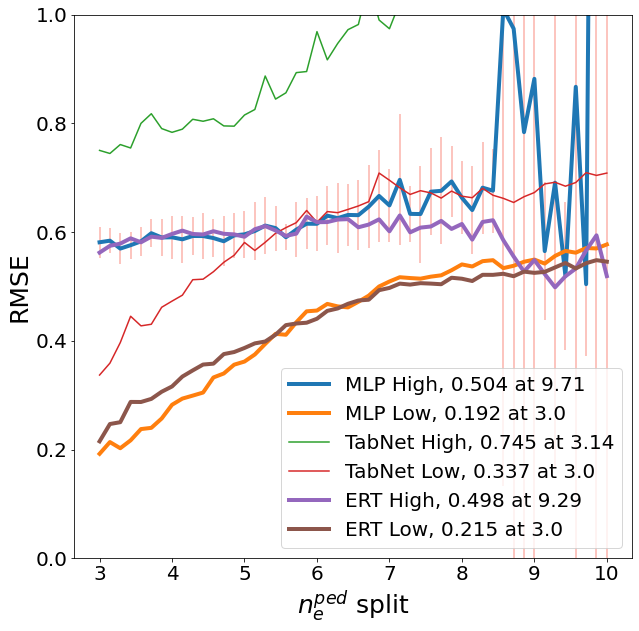

In [16]:
"""
A model type (MLP/ERT/TabNet) is split on low and high subsets of neped, and CV tested on same subset
"""
best_MLP_high = min(MLP_results['HnM_test'])
best_MLP_low = min(MLP_results['LnM_test'])
best_MLP_high_split = splits[np.argwhere(MLP_results['HnM_test'] == best_MLP_high)]
best_MLP_low_split = splits[np.argwhere(MLP_results['LnM_test'] == best_MLP_low)]

best_TabNet_high = min(TabNet_results['HnM_test'])
best_TabNet_low = min(TabNet_results['LnM_test'])
best_TabNet_high_split = splits[np.argwhere(TabNet_results['HnM_test'] == best_TabNet_high)]
best_TabNet_low_split = splits[np.argwhere(TabNet_results['LnM_test'] == best_TabNet_low)]

best_ERT_high = min(ERT_results['HnM_test'])
best_ERT_low = min(ERT_results['LnM_test'])
best_ERT_high_split = splits[np.argwhere(ERT_results['HnM_test'] == best_ERT_high)]
best_ERT_low_split = splits[np.argwhere(ERT_results['LnM_test'] == best_ERT_low)]


fig1 = plt.figure(figsize=(10, 10))
plt.plot(splits, MLP_results['HnM_test'], lw=4,label='MLP High, {:.3} at {:.3}'.format(best_MLP_high, best_MLP_high_split[0][0]))
plt.plot(splits, MLP_results['LnM_test'], lw=4,label='MLP Low, {:.3} at {:.3}'.format(best_MLP_low, best_MLP_low_split[0][0]))
# plt.errorbar(splits, MLP_results['HnM_test'], fmt='none', yerr=MLP_results['HnM_test_std'], alpha=0.6, color='black')
plt.plot(splits, TabNet_results['HnM_test'], label='TabNet High, {:.3} at {:.3}'.format(best_TabNet_high, best_TabNet_high_split[0][0]))
plt.plot(splits, TabNet_results['LnM_test'], label='TabNet Low, {:.3} at {:.3}'.format(best_TabNet_low, best_TabNet_low_split[0][0]))

plt.plot(splits, ERT_results['HnM_test'],lw=4, label='ERT High, {:.3} at {:.3}'.format(best_ERT_high, best_ERT_high_split[0][0]))
plt.plot(splits, ERT_results['LnM_test'],lw=4, label='ERT Low, {:.3} at {:.3}'.format(best_ERT_low, best_ERT_low_split[0][0]))
# plt.errorbar(splits, ERT_results['HnM_test'], fmt='none', yerr=ERT_results['HnM_test_std'], alpha=0.6, color='grey')
plt.errorbar(splits, MLP_results['HnM_test'], fmt='none', yerr=MLP_results['HnM_test_std'], alpha=0.6, color='salmon')

plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('RMSE')
plt.ylim(0, 1.0)
plt.legend()
plt.show()

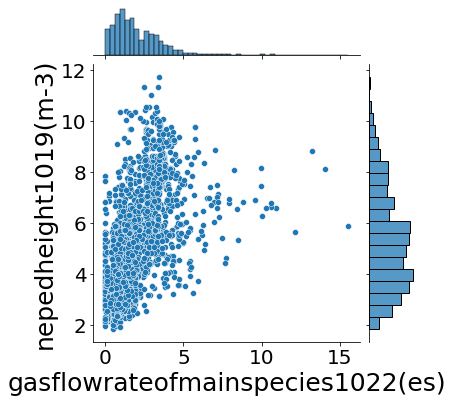

In [55]:
df = pd.read_csv('/home/adam/ENR_Sven/data-general/seperatrix_dataset.csv')
df_both = df[['Ip(MA)', 'B(T)', 'a(m)', 'averagetriangularity', 'P_NBI(MW)', 'P_ICRH(MW)','P_TOTPNBIPohmPICRH-Pshi(MW)','plasmavolume(m3)', 'q95', 'gasflowrateofmainspecies1022(es)', 'nepedheight1019(m-3)']]

df_both.describe()
col = 'gasflowrateofmainspecies1022(es)'
sns.jointplot(data=df_both, x=col, y='nepedheight1019(m-3)')
plt.show()

In [74]:

around_8 = df_both[(df_both['nepedheight1019(m-3)'] > 7.9) & (df_both['nepedheight1019(m-3)'] < 8.2)]
around_8.describe()


,Ip(MA),B(T),a(m),averagetriangularity,P_NBI(MW),P_ICRH(MW),P_TOTPNBIPohmPICRH-Pshi(MW),plasmavolume(m3),q95,gasflowrateofmainspecies1022(es),nepedheight1019(m-3)
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.591113,2.696026,0.912687,0.349792,16.709444,1.692406,19.184609,74.283596,3.251646,3.454391,8.055605
std,0.353114,0.174923,0.015225,0.051507,3.447721,1.733844,4.320229,2.033974,0.192453,2.013444,0.090717
min,2.467616,2.502469,0.882640,0.181202,11.490231,0.000000,12.337465,69.962020,2.591864,0.842539,7.906969
25%,2.473890,2.631768,0.908073,0.360707,15.220205,0.000741,16.030448,73.565695,3.141360,2.654814,7.985377
50%,2.477555,2.651945,0.912297,0.372119,15.898128,1.349823,19.085142,73.890900,3.338365,3.025607,8.041010
75%,2.482525,2.668191,0.916387,0.376780,17.806763,2.991124,21.719293,74.723302,3.381935,3.928662,8.130058
max,4.480694,3.567076,0.959051,0.389119,26.955746,5.133460,30.693523,80.708120,3.491397,14.050612,8.199807


In [45]:
around_7 = df_both[(df_both['nepedheight1019(m-3)'] > 6) & (df_both['nepedheight1019(m-3)'] < 7)]
around_7.describe()

,Ip(MA),B(T),a(m),averagetriangularity,P_NBI(MW),P_ICRH(MW),P_TOTPNBIPohmPICRH-Pshi(MW),plasmavolume(m3),q95,gasflowrateofmainspecies1022(es),nepedheight1019(m-3)
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,2.537762,2.596424,0.924342,0.278446,16.299373,1.678688,18.677480,75.711660,3.182542,2.940983,6.526066
std,0.409234,0.305706,0.018448,0.062426,4.667697,1.772230,5.762916,2.400656,0.224666,2.099019,0.282777
min,1.955504,1.963885,0.879901,0.182510,7.712729,0.000000,8.501015,70.011440,2.636937,0.000000,6.001465
25%,2.444578,2.380480,0.913194,0.238500,13.399223,0.000337,15.501794,74.193245,3.018101,1.576771,6.297555
50%,2.479183,2.653242,0.927667,0.267789,15.938074,1.521034,17.994398,75.785790,3.207087,2.597851,6.558847
75%,2.532157,2.719683,0.935412,0.317908,19.251844,3.047753,22.541918,76.590420,3.330599,3.362795,6.772912
max,3.779916,3.567646,0.974949,0.455669,27.590126,5.464022,33.213177,82.187740,3.934901,10.932990,6.985016


In [41]:
with open('./anom_detect_SimpleAE_ld20_splitexp_results.pickle', 'rb') as file:
    ae_final_results = pickle.load(file)
    final_losses = pickle.load(file)
    

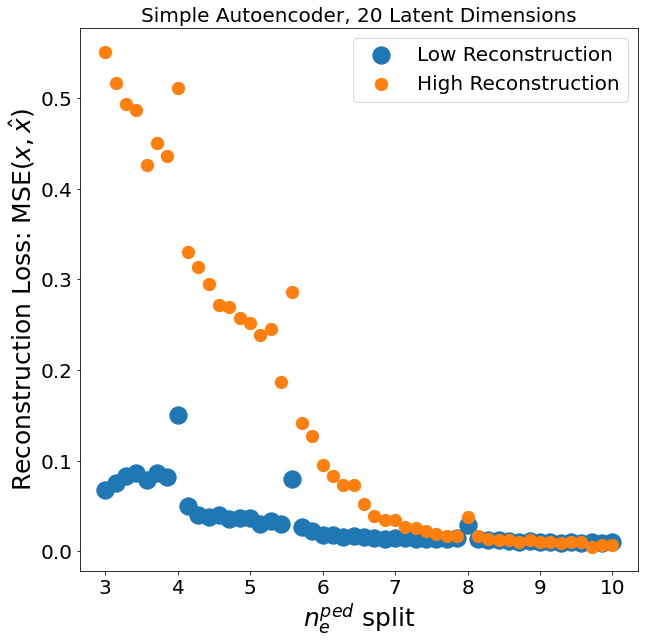

In [89]:
"""
AE is trained on low, and predicts on CV left out low, as well as high. 

The point we are interested in are where the recon loss is much greater for the high than it is for low
"""
fig = plt.figure(figsize=(10,10))

plt.scatter(final_losses['split'], final_losses['low'], s=300, label='Low Reconstruction')
plt.scatter(final_losses['split'], final_losses['high'], s=150, label='High Reconstruction')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('Reconstruction Loss: MSE($x, \hat{x}$)')
plt.legend()
plt.title('Simple Autoencoder, 20 Latent Dimensions')
plt.show()



In [4]:
with open('./anom_detect_VanillaVAE_ld20_split5to10_results.pickle', 'rb') as file:
    vae_results = pickle.load(file)
    vae_losses = pickle.load(file)

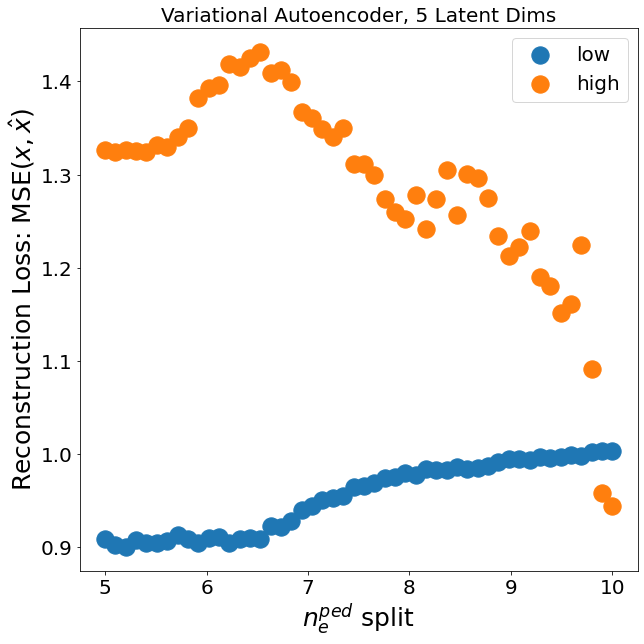

In [44]:
fig = plt.figure(figsize=(10,10))
plt.scatter(vae_losses['split'],vae_losses['low'], s=300, label='low')
plt.scatter(vae_losses['split'],vae_losses['high'], s=300,label='high')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('Reconstruction Loss: MSE($x, \hat{x}$)')
plt.title('Variational Autoencoder, 5 Latent Dims')
# plt.vlines(9.71, 1.0, 1.4)
plt.legend()
plt.show()

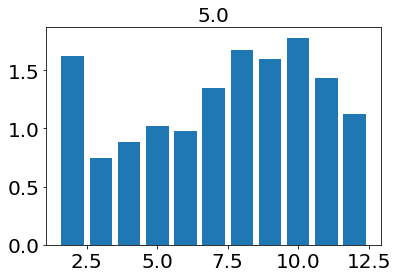

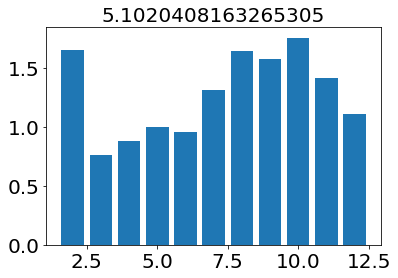

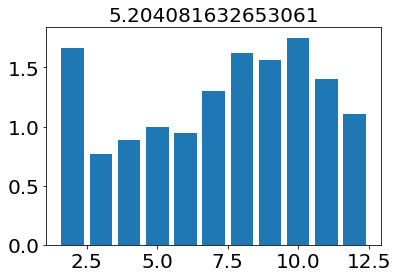

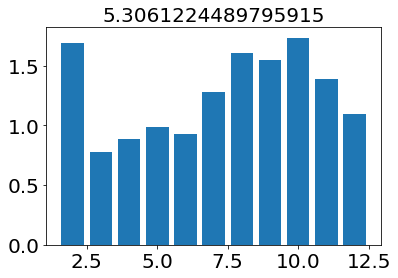

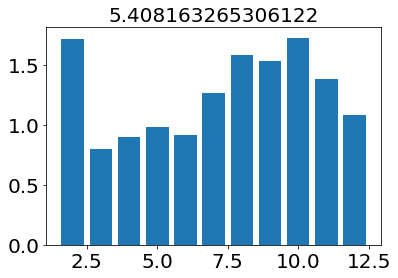

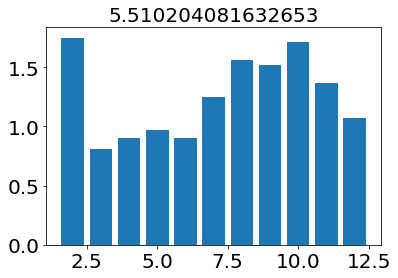

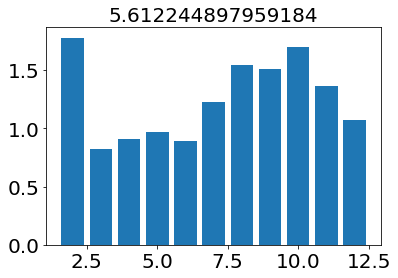

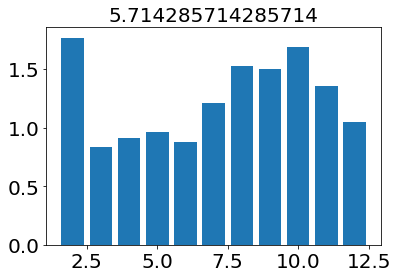

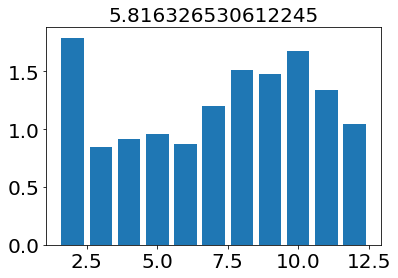

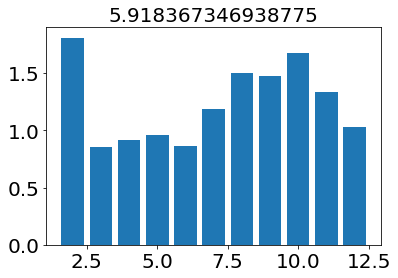

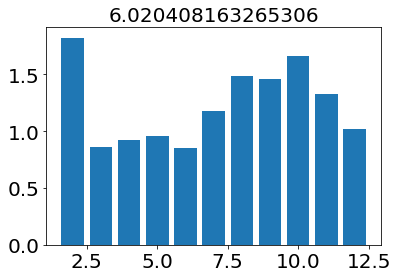

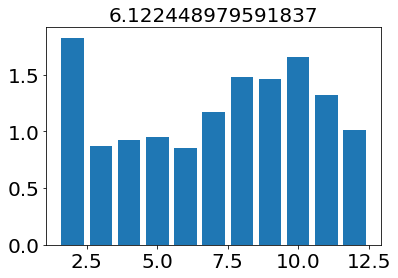

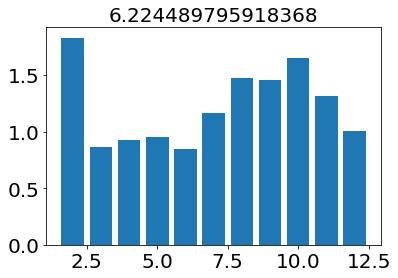

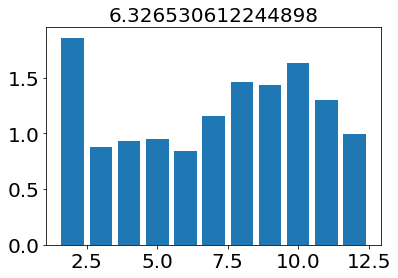

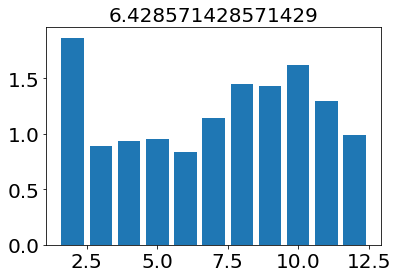

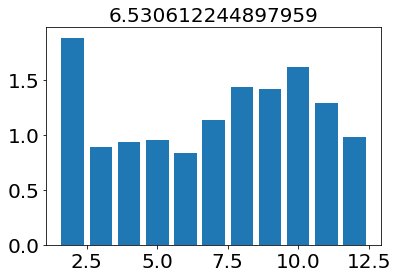

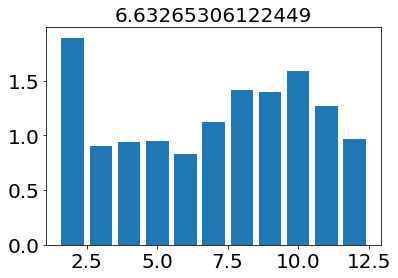

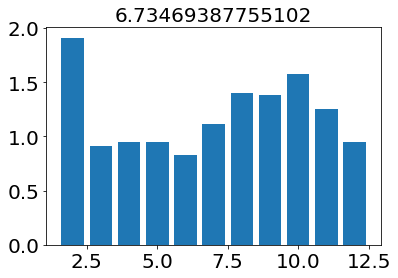

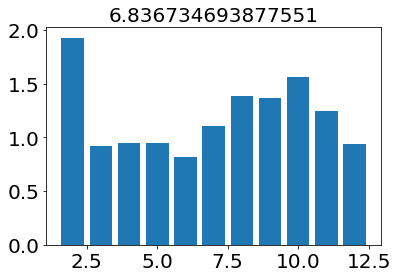

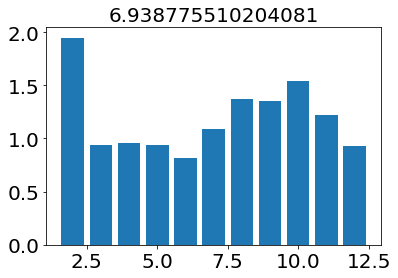

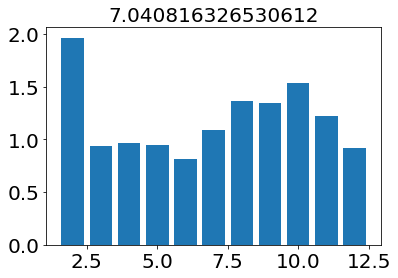

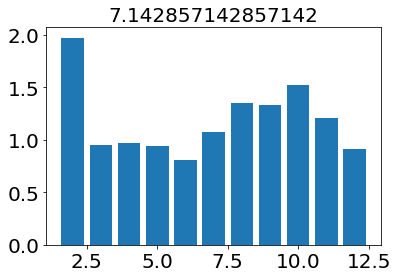

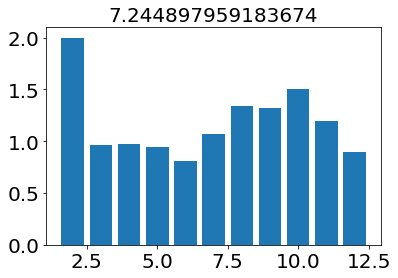

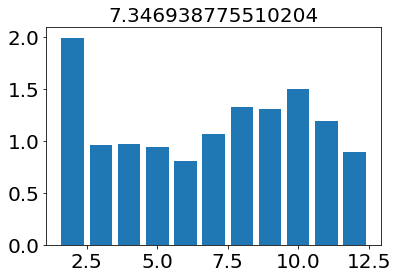

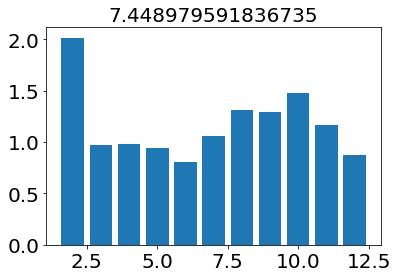

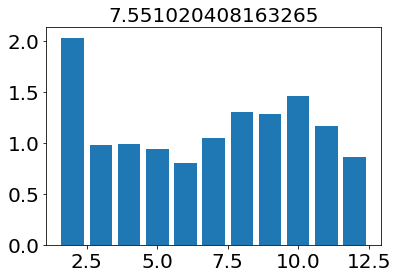

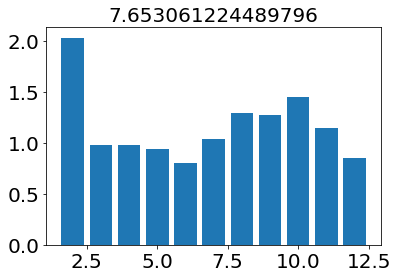

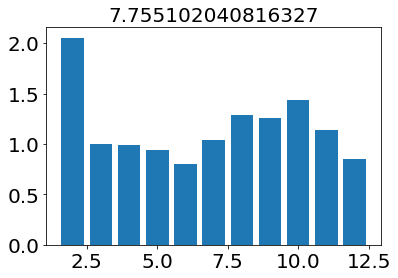

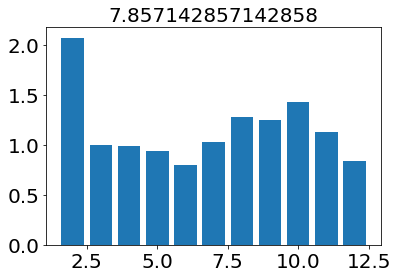

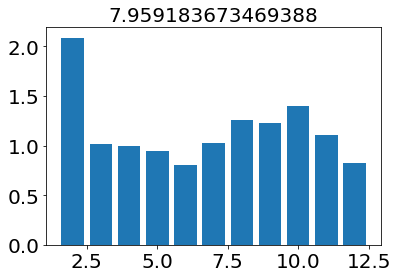

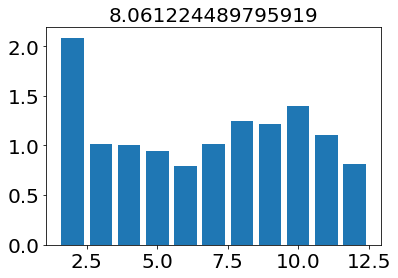

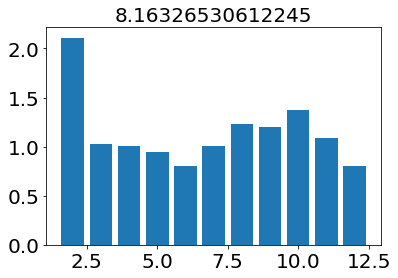

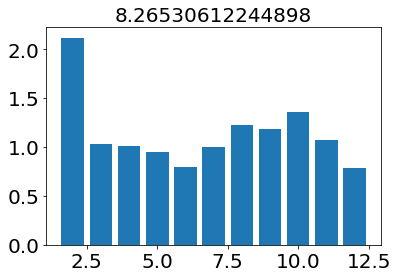

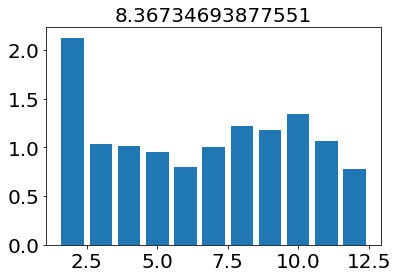

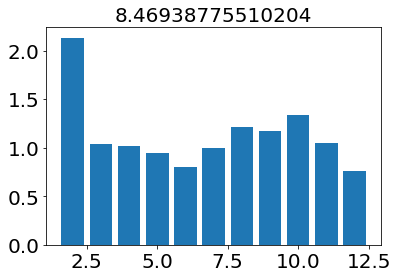

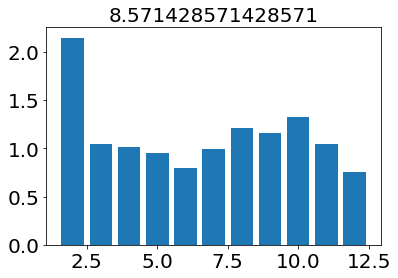

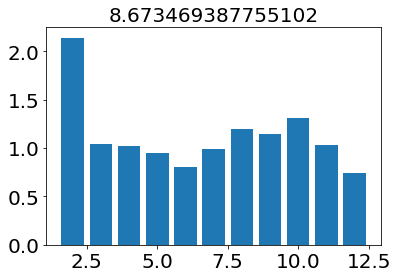

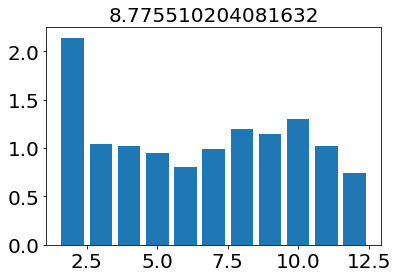

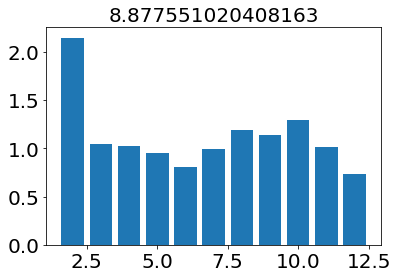

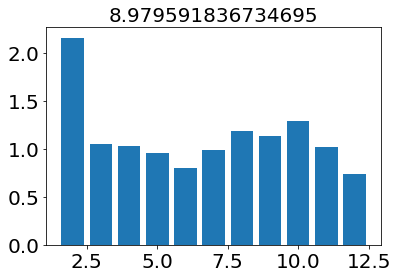

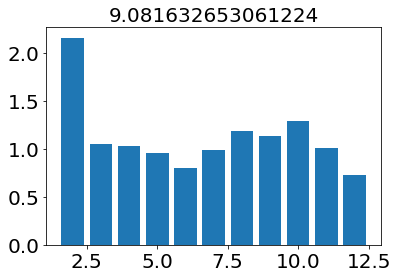

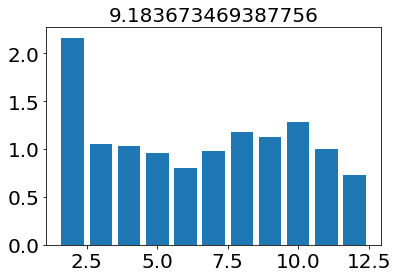

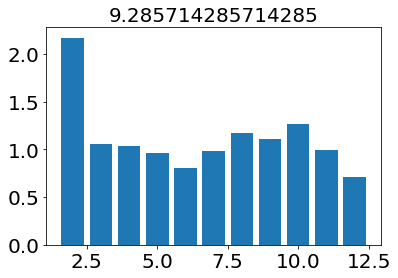

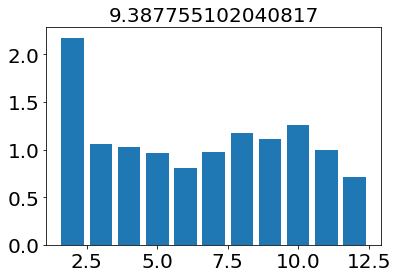

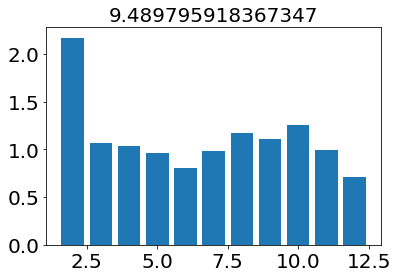

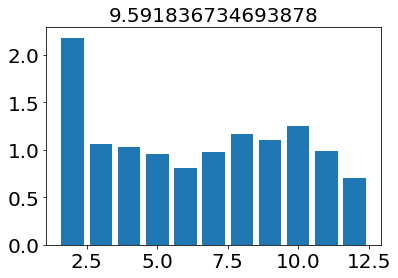

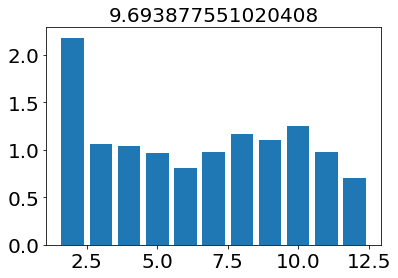

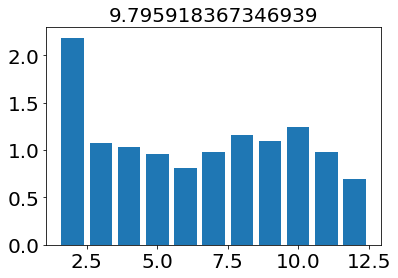

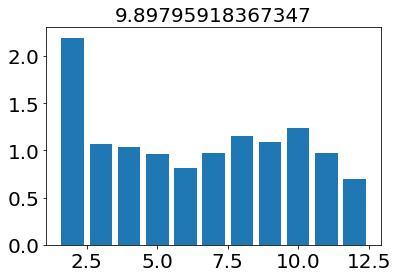

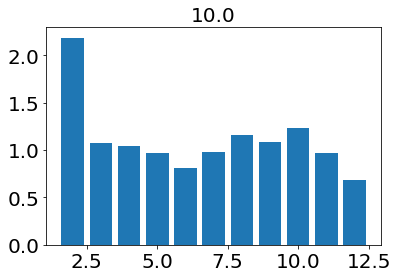

In [102]:
# 6.122448979591837, 8.061224489795919
for j in np.linspace(5, 10, num=50):
    digitized = np.digitize(vae_results[str(j)]['y_val'], np.linspace(1, 12, num=12))
    residual = [np.abs(vae_results[str(j)]['recon'])[digitized ==i].mean() for i in range(1, 12)]
    plt.bar(np.linspace(1, 12, 12)[1:12], residual)
    plt.title(j)
    plt.show()


In [9]:
df_both[df_both['nepedheight1019(m-3)'] > 9].describe()

,Ip(MA),B(T),a(m),averagetriangularity,P_NBI(MW),P_ICRH(MW),P_TOTPNBIPohmPICRH-Pshi(MW),plasmavolume(m3),q95,gasflowrateofmainspecies1022(es),nepedheight1019(m-3)
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.510344,2.684973,0.897768,0.358884,17.473617,2.337547,20.599532,72.720220,3.173802,3.161897,9.723798
std,0.171779,0.128658,0.015709,0.039982,3.917821,1.688682,4.917995,1.828686,0.185858,0.989040,0.565277
min,2.464685,2.275982,0.880457,0.190484,11.632935,0.000000,12.416947,70.001915,2.775679,0.756600,9.020610
25%,2.472148,2.645182,0.885469,0.340134,15.079922,1.213420,17.399102,71.213620,3.040713,2.599995,9.257905
50%,2.478625,2.652811,0.892128,0.356855,15.977037,2.176993,19.342077,72.287320,3.111552,3.289694,9.641965
75%,2.485362,2.714412,0.912560,0.384966,18.039310,3.500181,21.804679,74.088365,3.365006,3.654598,10.017700
max,3.526590,3.609681,0.950578,0.437172,27.858067,6.174266,33.130787,79.298670,3.511281,5.766405,11.737379


<AxesSubplot:>

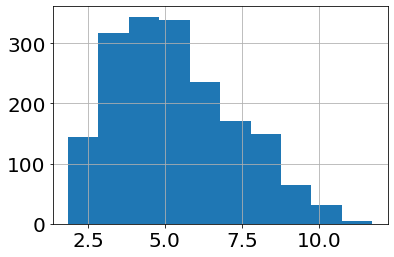

In [17]:
df_both['nepedheight1019(m-3)'].hist()

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
RS = RobustScaler()
df_both_scale = RS.fit_transform(df_both)

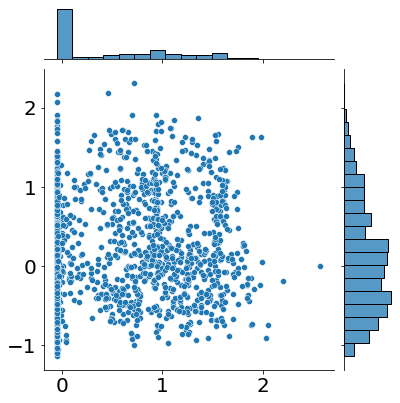

In [25]:
for i in range(1, 10):
    sns.jointplot(x=df_both_scale[:, i], y=df_both_scale[:, 10])

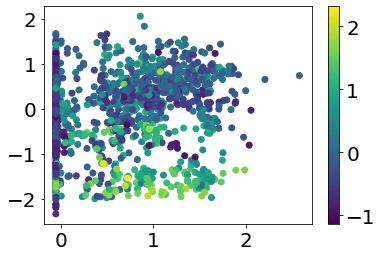

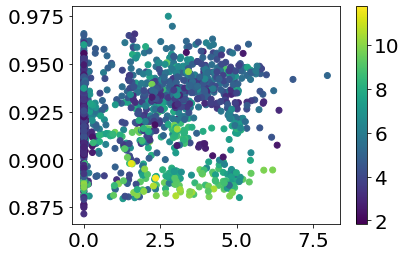

In [38]:
# ['Ip(MA)', 'B(T)', 'a(m)', 'averagetriangularity', 'P_NBI(MW)', 'P_ICRH(MW)','P_TOTPNBIPohmPICRH-Pshi(MW)','plasmavolume(m3)', 'q95', 'gasflowrateofmainspecies1022(es)', 'nepedheight1019(m-3)']

plt.scatter(df_both_scale[:, 5], df_both_scale[:, 2], c=df_both_scale[:, 10])
plt.colorbar()
plt.show()

plt.scatter(df_both['P_ICRH(MW)'], df_both['a(m)'], c=df_both['nepedheight1019(m-3)'])
plt.colorbar()
plt.show()

In [56]:
with open('./anom_detect_SimpleAE_ld5_split5to10_results.pickle', 'rb') as file:
    vae_results = pickle.load(file)
    vae_losses = pickle.load(file)

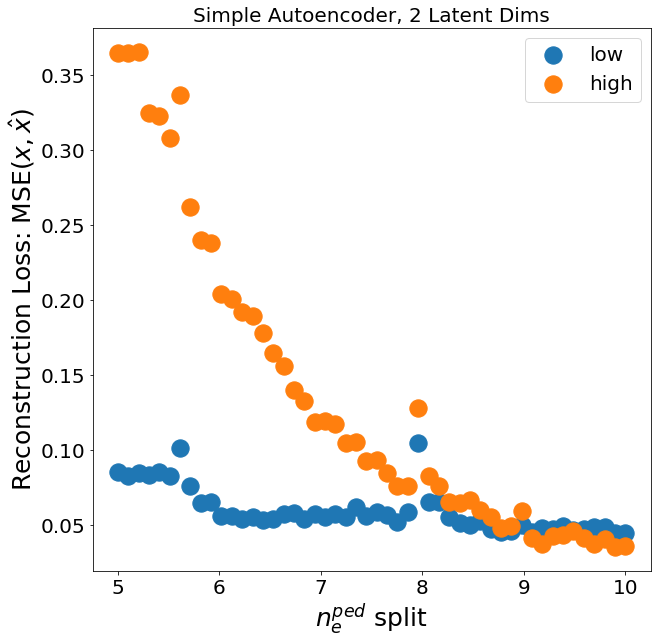

In [58]:
fig = plt.figure(figsize=(10,10))
plt.scatter(vae_losses['split'],vae_losses['low'], s=300, label='low')
plt.scatter(vae_losses['split'],vae_losses['high'], s=300,label='high')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('Reconstruction Loss: MSE($x, \hat{x}$)')
plt.title('Simple Autoencoder, 2 Latent Dims')
# plt.vlines(9.71, 1.0, 1.4)
plt.legend()
plt.show()

In [64]:
with open('/home/adam/ENR_Sven/greedy-pillows/src/transfer_learning/out/transfer_learning_results_trial_SGD.pickle', 'rb') as file:
    results = pickle.load(file)
    args = pickle.load(file)

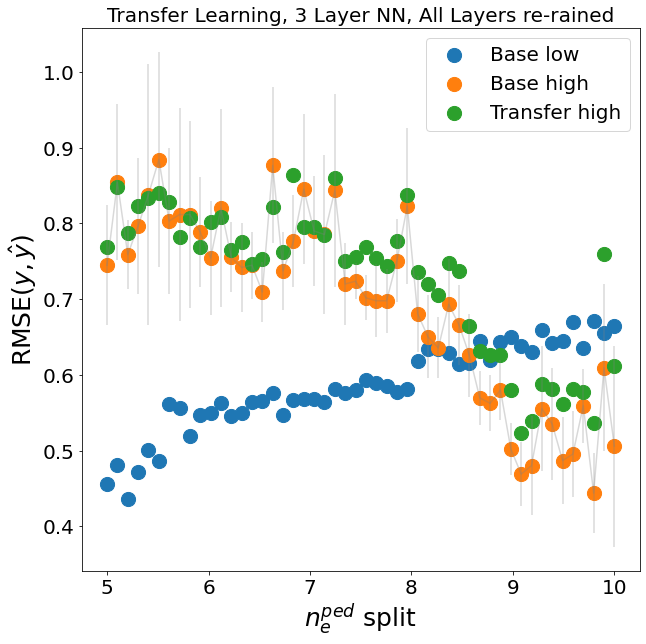

In [74]:
splits = np.linspace(5, 10, num=50)
fig = plt.figure(figsize=(10,10))
plt.scatter(splits,results['pre_low'], s=200, label='Base low')
plt.scatter(splits,results['pre_high'], s=200,label='Base high')
# plt.errorbar(splits, results['post_low'], yerr=results['post_low_std'], alpha=0.3, color='black')
# plt.scatter(splits,results['post_low'], s=200, label='Transfer low')
plt.scatter(splits,results['post_high'], s=200,label='Transfer high')
plt.errorbar(splits, results['pre_high'], yerr=results['pre_high_std'], alpha=0.3, color='grey')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('RMSE($y, \hat{y}$)')
plt.title('Transfer Learning, 3 Layer NN, All Layers re-rained')
# plt.vlines(9.71, 1.0, 1.4)
plt.legend()
plt.show()

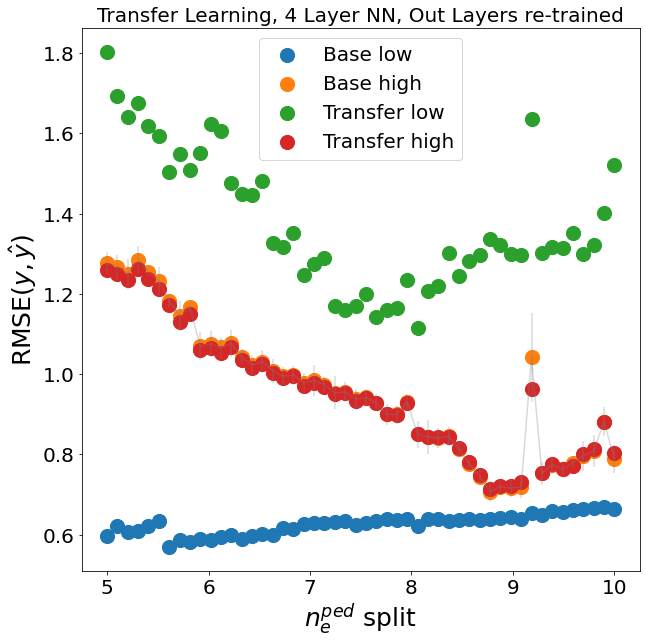

In [76]:
with open('/home/adam/ENR_Sven/greedy-pillows/src/transfer_learning/out/transfer_learning_results_trial_SGD_cycle_out_layer.pickle', 'rb') as file:
    results = pickle.load(file)
    args = pickle.load(file)

splits = np.linspace(5, 10, num=50)
fig = plt.figure(figsize=(10,10))
plt.scatter(splits,results['pre_low'], s=200, label='Base low')
plt.scatter(splits,results['pre_high'], s=200,label='Base high')
# plt.errorbar(splits, results['post_low'], yerr=results['post_low_std'], alpha=0.3, color='black')
plt.scatter(splits,results['post_low'], s=200, label='Transfer low')
plt.scatter(splits,results['post_high'], s=200,label='Transfer high')
plt.errorbar(splits, results['pre_high'], yerr=results['pre_high_std'], alpha=0.3, color='grey')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('RMSE($y, \hat{y}$)')
plt.title('Transfer Learning, 4 Layer NN, Out Layers re-trained')
# plt.vlines(9.71, 1.0, 1.4)
plt.legend()
plt.show()

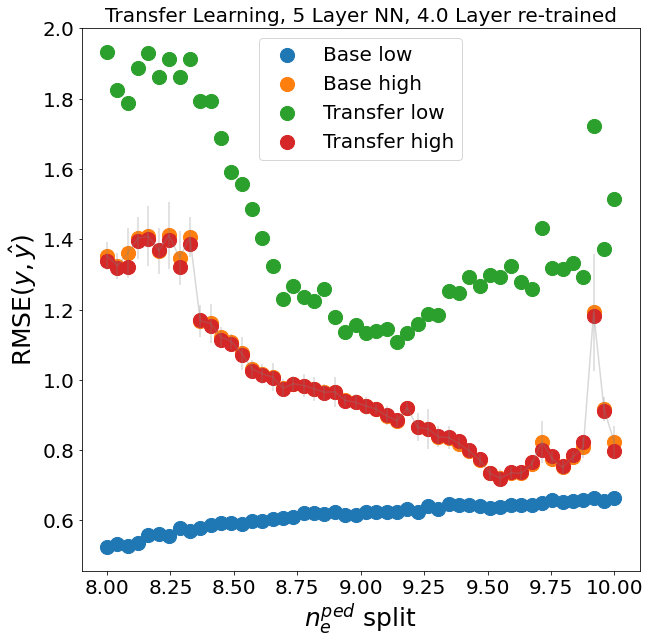

In [79]:
file_name = '/home/adam/ENR_Sven/greedy-pillows/src/transfer_learning/out/transfer_learning_results_trial_SGD_cycle_5_layer_freeze_4.0_layer.pickle'
with open(file_name, 'rb') as file:
    results = pickle.load(file)
    args = pickle.load(file)

splits = np.linspace(8, 10, num=50)
fig = plt.figure(figsize=(10,10))
plt.scatter(splits,results['pre_low'], s=200, label='Base low')
plt.scatter(splits,results['pre_high'], s=200,label='Base high')
# plt.errorbar(splits, results['post_low'], yerr=results['post_low_std'], alpha=0.3, color='black')
plt.scatter(splits,results['post_low'], s=200, label='Transfer low')
plt.scatter(splits,results['post_high'], s=200,label='Transfer high')
plt.errorbar(splits, results['pre_high'], yerr=results['pre_high_std'], alpha=0.3, color='grey')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('RMSE($y, \hat{y}$)')
plt.title('Transfer Learning, 5 Layer NN, 4.0 Layer re-trained')
# plt.vlines(9.71, 1.0, 1.4)
plt.legend()
plt.show()

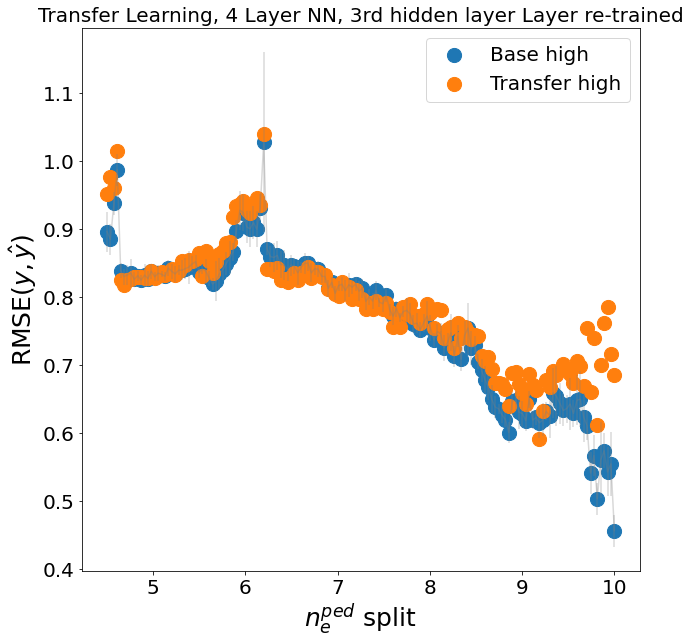

In [84]:
file_name= '/home/adam/ENR_Sven/greedy-pillows/src/transfer_learning/out/transfer_learning_results_trial_Adam_cycle_4_layer_freeze_3.0_layer.pickle'
with open(file_name, 'rb') as file:
    results = pickle.load(file)
    args = pickle.load(file)

splits = np.linspace(4.5, 10, num=150)
fig = plt.figure(figsize=(10,10))
#plt.scatter(splits,results['pre_low'], s=200, label='Base low')
plt.scatter(splits,results['pre_high'], s=200,label='Base high')
# plt.errorbar(splits, results['post_low'], yerr=results['post_low_std'], alpha=0.3, color='black')
#plt.scatter(splits,results['post_low'], s=200, label='Transfer low')
plt.scatter(splits,results['post_high'], s=200,label='Transfer high')
plt.errorbar(splits, results['pre_high'], yerr=results['pre_high_std'], alpha=0.3, color='grey')
plt.xlabel('$n_e^{ped}$ split')
plt.ylabel('RMSE($y, \hat{y}$)')
plt.title('Transfer Learning, 4 Layer NN, 3rd hidden layer Layer re-trained')
# plt.vlines(9.71, 1.0, 1.4)
plt.legend()
plt.show()